# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Boston Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features['B']
logdis = np.log(boston_features['DIS'])
loglstat = np.log(boston_features['LSTAT'])

# Min-Max scaling
boston_features['B'] = (b-min(b))/(max(b)-min(b))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))

# Standardization
boston_features['LSTAT'] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [2]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns = ['target'])

### Perform a train-test split

In [3]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

379 127 379 127


### Apply your model to the train set

In [5]:
# Importing and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate predictions on training and test sets

In [6]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

### Calculate training and test residuals

In [7]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [8]:
print(train_residuals)
print(test_residuals)

        target
90    2.582000
335   1.997502
99   -1.229952
371 -23.967384
188   1.438915
..         ...
238   2.994158
57    0.486512
106  -3.061407
284  -5.842204
35    3.475456

[379 rows x 1 columns]
        target
194   1.799075
351   2.837993
331   0.029294
293  -0.967244
420   3.502833
..         ...
215  -2.018895
492   0.423571
133  -0.176889
107  -0.059426
7   -12.462130

[127 rows x 1 columns]


### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [9]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 21.300087124849355
Test Mean Squared Error: 23.103193319334896


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

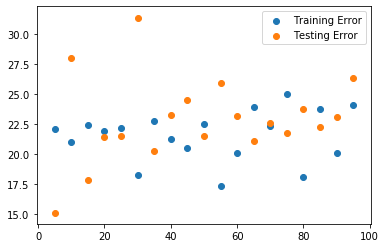

In [10]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

-------------0.95% Train 0.05% Test Ratio----------------
Train Mean_Squared_Error: 21.36428330590611
Test Mean_Squared_Error: 28.375134382001857 

-------------0.9% Train 0.1% Test Ratio----------------
Train Mean_Squared_Error: 22.36270747814086
Test Mean_Squared_Error: 15.999291244787088 

-------------0.85% Train 0.15% Test Ratio----------------
Train Mean_Squared_Error: 21.042208980084826
Test Mean_Squared_Error: 25.542720891964553 

-------------0.8% Train 0.2% Test Ratio----------------
Train Mean_Squared_Error: 22.33482258309848
Test Mean_Squared_Error: 19.770061342623773 

-------------0.75% Train 0.25% Test Ratio----------------
Train Mean_Squared_Error: 21.795084810342523
Test Mean_Squared_Error: 22.850789593775367 

-------------0.7% Train 0.3% Test Ratio----------------
Train Mean_Squared_Error: 21.855576761365104
Test Mean_Squared_Error: 22.38470315037116 

-------------0.65% Train 0.35% Test Ratio----------------
Train Mean_Squared_Error: 24.303019540053235
Test Mean_Squ

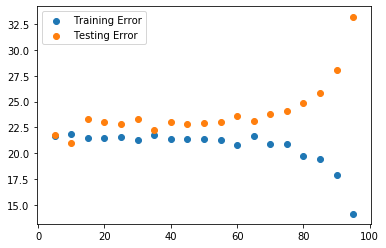

In [22]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
    print('-------------{}% Train {}% Test Ratio----------------'.format(round((1 - abs(t_size/100)),2),round((t_size/100),2)))
    print('Train Mean_Squared_Error:',mean_squared_error(y_train, y_hat_train))
    print('Test Mean_Squared_Error:',mean_squared_error(y_test, y_hat_test),'\n')
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

-------------0.95% Train 0.05% Test Ratio----------------
Train Mean_Squared_Error: 21.669810735515735
Test Mean_Squared_Error: 22.744103816874077 

-------------0.9% Train 0.1% Test Ratio----------------
Train Mean_Squared_Error: 21.580310892753737
Test Mean_Squared_Error: 23.305977974477592 

-------------0.85% Train 0.15% Test Ratio----------------
Train Mean_Squared_Error: 21.658054058280726
Test Mean_Squared_Error: 22.51689472499991 

-------------0.8% Train 0.2% Test Ratio----------------
Train Mean_Squared_Error: 21.51181800692296
Test Mean_Squared_Error: 23.019259343303215 

-------------0.75% Train 0.25% Test Ratio----------------
Train Mean_Squared_Error: 21.577384941669308
Test Mean_Squared_Error: 22.61977439547322 

-------------0.7% Train 0.3% Test Ratio----------------
Train Mean_Squared_Error: 21.485702934558326
Test Mean_Squared_Error: 22.7704104206931 

-------------0.65% Train 0.35% Test Ratio----------------
Train Mean_Squared_Error: 21.47790408400127
Test Mean_Squar

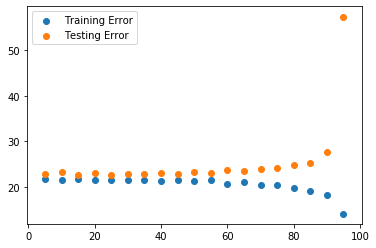

In [23]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
    print('-------------{}% Train {}% Test Ratio----------------'.format(round((1 - abs(t_size/100)),2),round((t_size/100),2)))
    print('Train Mean_Squared_Error:',np.mean(temp_train_err))
    print('Test Mean_Squared_Error:',np.mean(temp_test_err),'\n')
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

What's happening here? Evaluate your result!

In [24]:
# Here our for loop is creating 20 linear models, each with a different ratio
# of train/test data, runung each of these models 100 times,
# and we are plotting the average error of these model iterations to compare the
# performance of the various ratios. 

# The first ratio is 95% train, 5% test. From here to about 40% train, 60% test
# the errors are about the same with the more skewed ratios performing better.
# After this we experience overfitting where the training error is lower and 
# the testing error continues to increase.

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.